# Modelo de Riqueza
En este modelo se analiza una economía basada en agentes muy simple, extraída de la econofísica y que presenta un enfoque de mecánica estadística para la distribución de la riqueza [ [Dragulescu2002](https://arxiv.org/abs/cond-mat/0211175) ]. 

## Reglas
Las reglas de nuestro modelo son:
* Hay algunos agentes.
* Todos los agentes comienzan con 1 unidad de dinero.
* En cada paso del modelo, un agente entrega 1 unidad de dinero (si la tiene) a otro agente.

A pesar de su simplicidad, este modelo produce resultados que a menudo son inesperados para quienes no están familiarizados con él. Para nuestros propósitos, también demuestra fácilmente las funciones principales de Mesa.

## Imports

Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para poder modelar a los integrantes de nuestro sistema usando el framework de `mesa` es necesario importar dos clases: una para el modelo general, y otro para los agentes.

In [9]:
from mesa import Agent, Model
from mesa.time import RandomActivation

# For a jupyter notebook add the following line:
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

In [10]:
class MoneyAgent(Agent):
    def __init__(self, id, model):
        super().__init__(id, model)
        self.wealth = 1
        
    def step(self):
        if self.wealth == 0:
            return

        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1

In [14]:
class MoneyModel(Model):
    def __init__(self, num_agents):
        self.schedule = RandomActivation(self)

        for i in range(num_agents):
            agent = MoneyAgent(i, self)
            self.schedule.add(agent)

    def step(self):
        self.schedule.step()

In [15]:
NUM_AGENTS = 10
MAX_ITERATIONS = 10

model = MoneyModel(NUM_AGENTS)
for i in range(MAX_ITERATIONS):
    model.step()

(array([7., 0., 0., 0., 1., 0., 1., 0., 0., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

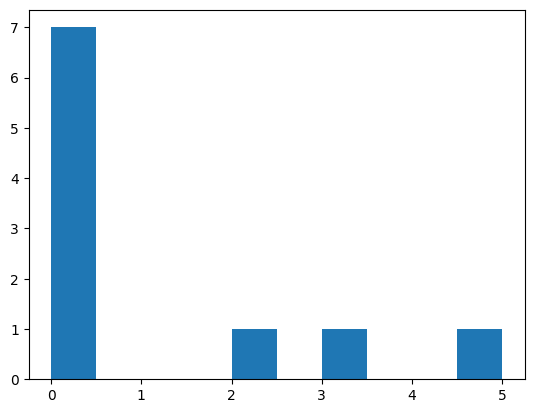

In [16]:
agent_wealth = [agent.wealth for agent in model.schedule.agents]
plt.hist(agent_wealth)